![Texto alternativo](https://laserud.co/wp-content/uploads/2020/05/cropped-LOGOLASER-1.jpg "Grupo LASER")

# Redes neuronales con Tensorflow

Tensorflow es una tecnología desarrollada por Google para el procesamiento de datos utilizando redes neuronales haciendo uso de la tecnología Keras para la definición de las capas que componen la red; permitiendo la consolidación de un marco de trabajo claro, sencillo, portable y con el potencial para desarrollar modelos a gran escala.

En el siguiente fragmento de código encontraremos como instalar la dependencia **tensorflow** con la cual interactuaremos en el desarrollo de esta sección de redes neuronales; si quieres conocer a mayor detalle la implementación de la misma, casos de exito y demás temas de interés puedes entrar a la documentación <a href="https://www.tensorflow.org">aquí</a>

In [1]:
!pip install tensorflow

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora vamos a agregar la librería tensorflow, junto con otras librerias que vamos a utilizar en el desarrollo de esta sección; como lo son keras, layers y datetime

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import datetime

print(tf.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.5.0-rc0


Ahora vamos a crear una función **setup_simple_tensorflow_model** que recibe como parametro la variable **train_data** que hace referencia al conjunto de datos de entrenamiento, y debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [3]:


def setup_simple_tensorflow_model(train):
    start_time = datetime.datetime.now()
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    elapsed_time = datetime.datetime.now() - start_time
    train_elapsed_time = elapsed_time.total_seconds() * 1000
    return model, train_elapsed_time

En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [4]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
target_column_name = 'type'

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación de la red neuronal con el siguiente fragmento de código:

In [35]:
dataset.pop('animal_name')

# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)
# Ahora vamos a extraer la variable que representa la decision de ambos conjuntos de datos (entrenamiento, y validacion) respectivamente

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [7]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
hair,61.0,0.377049,0.488669,0.0,0.0,0.0,1.0,1.0
feathers,61.0,0.196721,0.400819,0.0,0.0,0.0,0.0,1.0
eggs,61.0,0.606557,0.492568,0.0,0.0,1.0,1.0,1.0
milk,61.0,0.360656,0.484176,0.0,0.0,0.0,1.0,1.0
airbone,61.0,0.213115,0.412907,0.0,0.0,0.0,0.0,1.0
aquatic,61.0,0.377049,0.488669,0.0,0.0,0.0,1.0,1.0
predator,61.0,0.557377,0.500819,0.0,0.0,1.0,1.0,1.0
toother,61.0,0.590164,0.495885,0.0,0.0,1.0,1.0,1.0
backbone,61.0,0.803279,0.400819,0.0,1.0,1.0,1.0,1.0
breathes,61.0,0.770492,0.424006,0.0,1.0,1.0,1.0,1.0


In [8]:
train_data.corr(method='pearson')

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.385004,-0.896737,0.965399,-0.239676,-0.395881,-0.055820,0.579544,0.299912,0.424607,-0.232468,-0.161764,0.306151,0.106363,0.248610,0.532527,-0.656813
feathers,-0.385004,1.000000,0.398563,-0.371682,0.648801,-0.044638,-0.223220,-0.593846,0.244898,0.270089,-0.147871,-0.219133,-0.199503,0.307603,0.026688,-0.025861,-0.236044
eggs,-0.896737,0.398563,1.000000,-0.932555,0.337190,0.349614,-0.042088,-0.602922,-0.314145,-0.359760,-0.004011,0.175344,-0.290199,-0.201227,-0.232681,-0.498408,0.636125
milk,0.965399,-0.371682,-0.932555,1.000000,-0.307501,-0.372995,-0.018028,0.625890,0.371682,0.409915,-0.224424,-0.148149,0.256909,0.162274,0.265120,0.567892,-0.710710
airbone,-0.239676,0.648801,0.337190,-0.307501,1.000000,-0.157076,-0.342205,-0.543101,-0.044574,0.284031,-0.155504,-0.230444,0.021834,0.055621,0.009252,-0.302567,-0.041577
aquatic,-0.395881,-0.044638,0.349614,-0.372995,-0.157076,1.000000,0.420886,0.098094,0.044638,-0.621087,0.137459,0.569171,-0.362568,-0.044524,-0.228283,-0.148482,0.311492
predator,-0.055820,-0.223220,-0.042088,-0.018028,-0.342205,0.420886,1.000000,0.196929,-0.025861,-0.329386,0.266277,0.216299,-0.118185,0.034997,-0.373785,0.063181,0.130766
toother,0.579544,-0.593846,-0.602922,0.625890,-0.543101,0.098094,0.196929,1.000000,0.593846,-0.058476,0.005976,0.369006,-0.194456,0.299822,0.158706,0.339951,-0.478518
backbone,0.299912,0.244898,-0.314145,0.371682,-0.044574,0.044638,-0.025861,0.593846,1.000000,0.220252,-0.152800,0.219133,-0.416934,0.704170,0.205879,0.440996,-0.828374
breathes,0.424607,0.270089,-0.359760,0.409915,0.284031,-0.621087,-0.329386,-0.058476,0.220252,1.000000,-0.263261,-0.600733,0.426798,0.095502,0.117133,0.250900,-0.508052


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

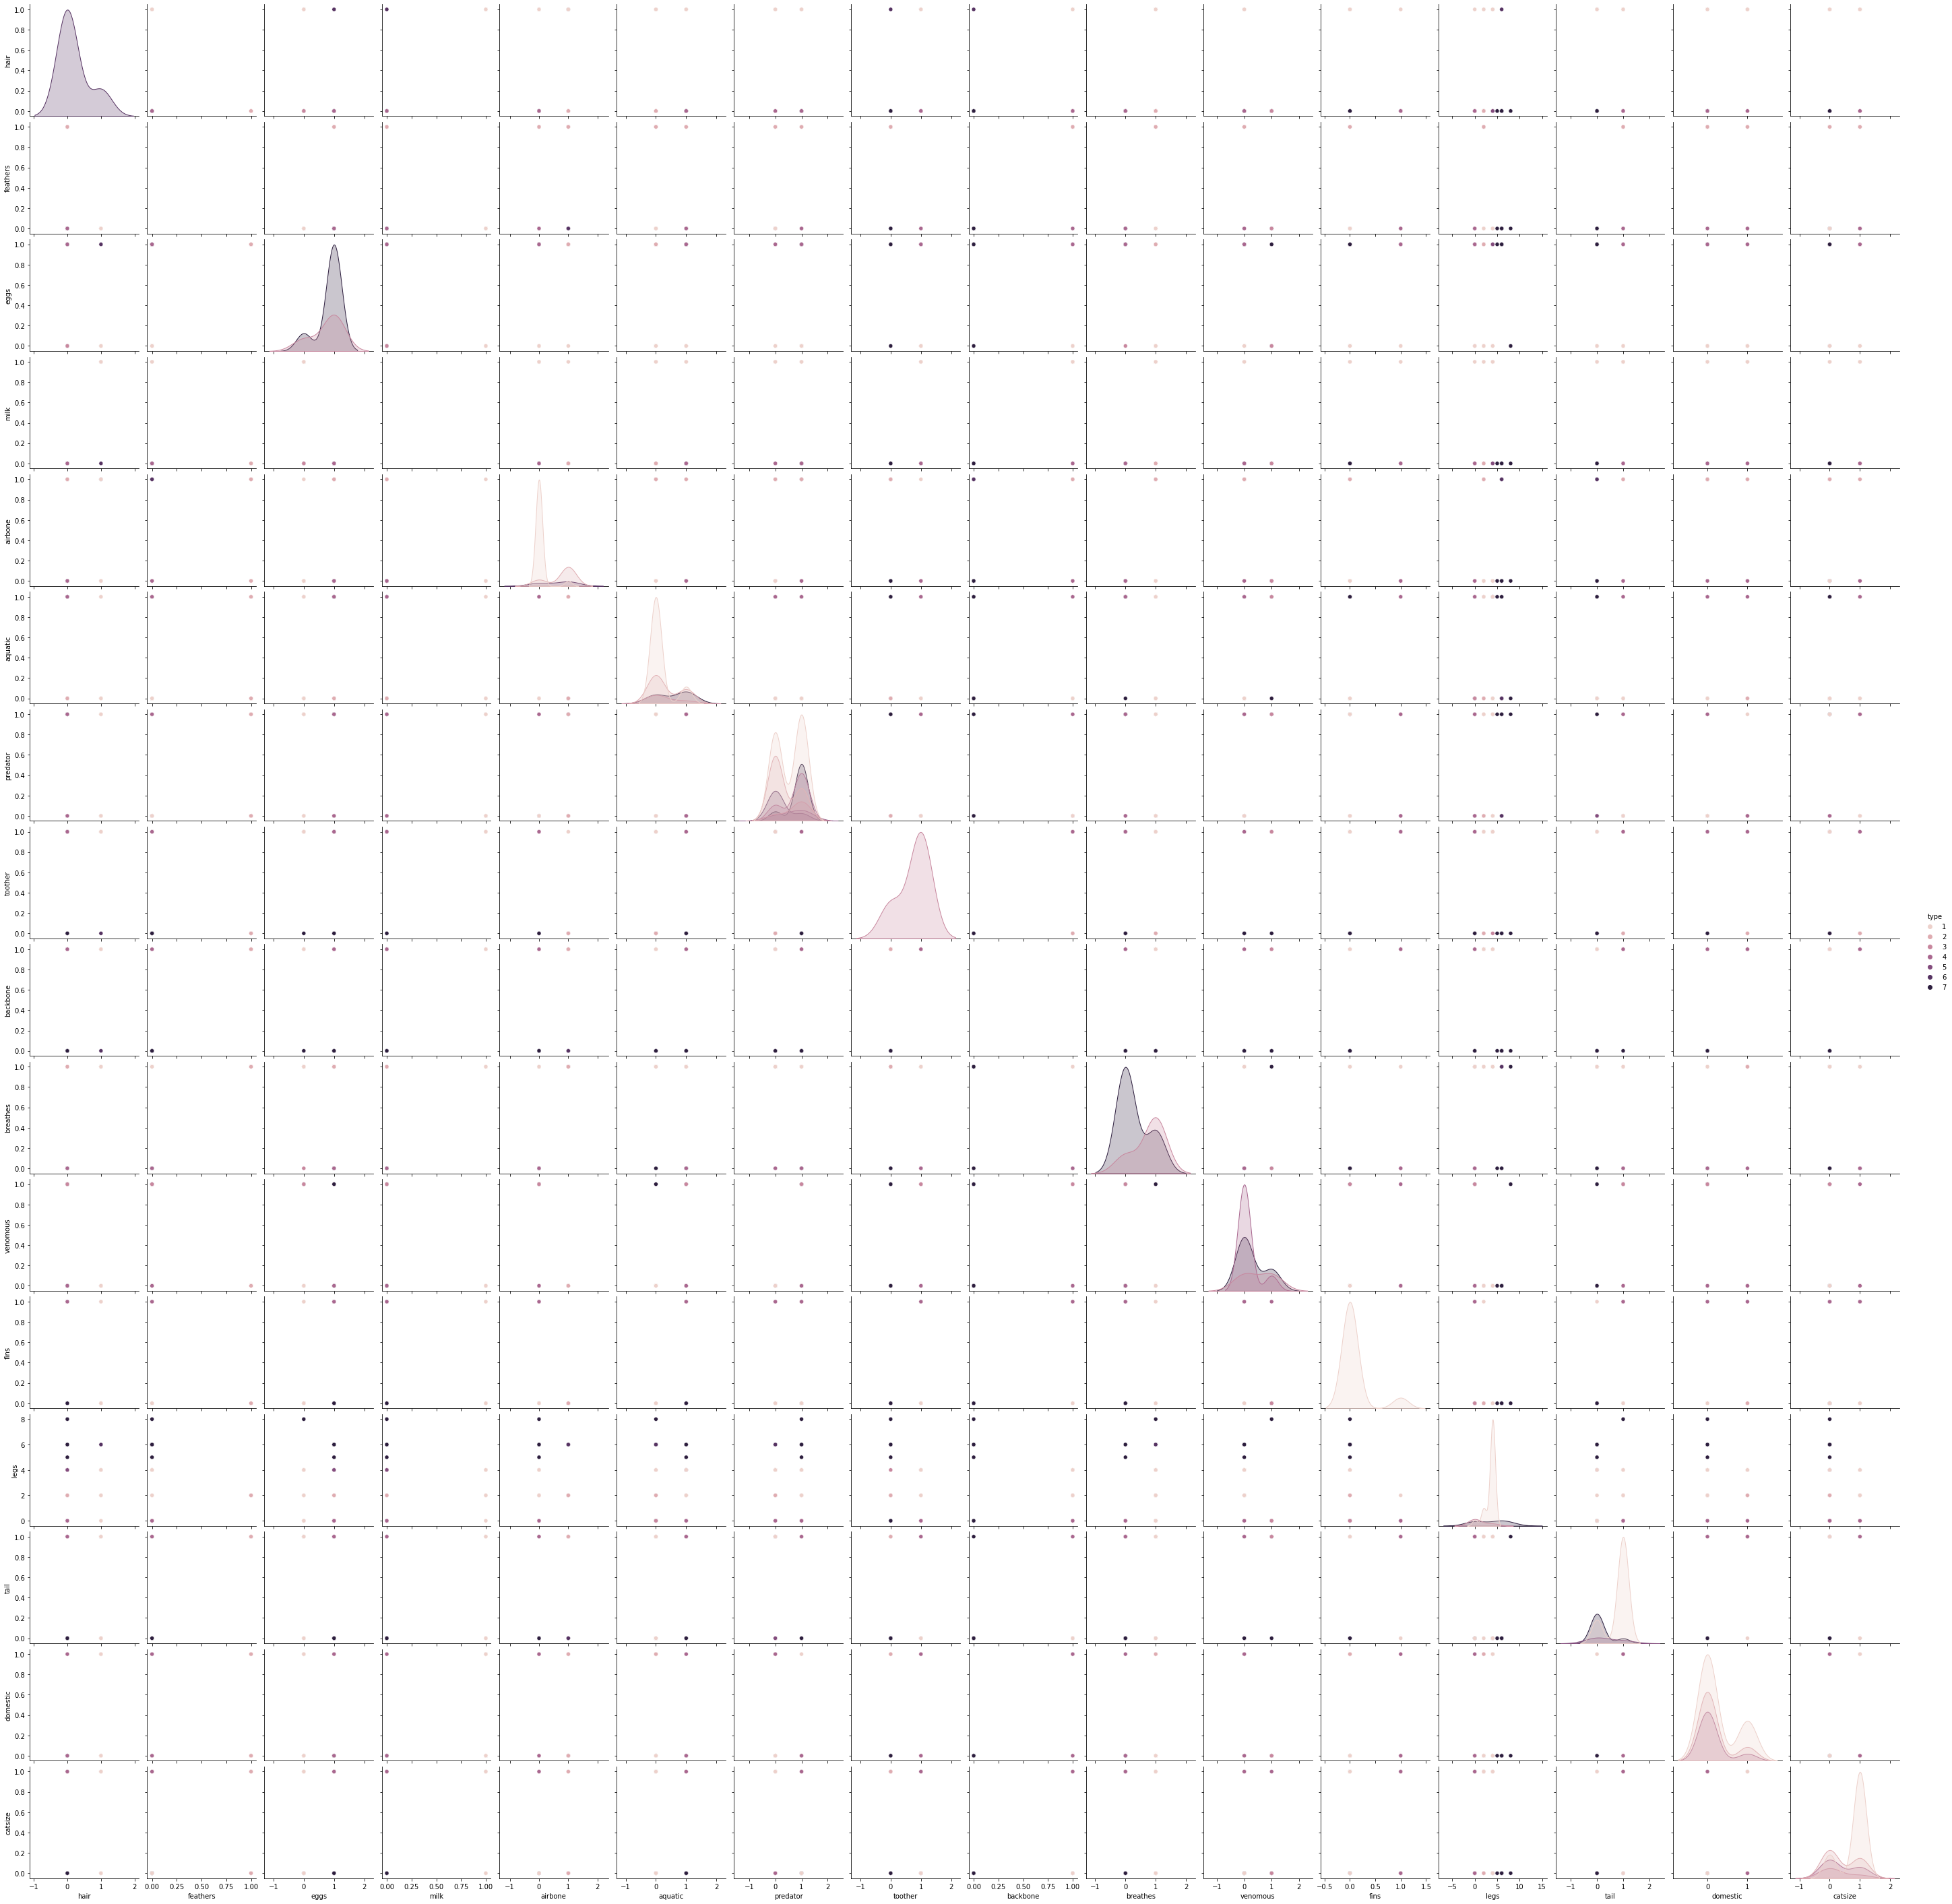

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con las siguientes lineas de código se extraen por separado los valores del conjunto de datos con los que se validara la red neuronal.

In [36]:
train_label = train_data.pop('type')
test_label = test_data.pop('type')

A continuación se define la función **norm** con la cual se le hara una pseudo normalización a los datos de entrenamiento y validación almacenandolos en las variables normalized_train_data y normalized_test_data respectivamente

In [37]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normalized_train_data = norm(train_data)
normalized_test_data = norm(test_data)

normalized_train_data.pop('type')
normalized_test_data.pop('type')

1    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
12   NaN
13   NaN
18   NaN
21   NaN
25   NaN
26   NaN
27   NaN
28   NaN
35   NaN
36   NaN
41   NaN
42   NaN
46   NaN
50   NaN
58   NaN
59   NaN
60   NaN
62   NaN
67   NaN
69   NaN
74   NaN
75   NaN
79   NaN
80   NaN
82   NaN
84   NaN
86   NaN
87   NaN
89   NaN
91   NaN
94   NaN
95   NaN
97   NaN
99   NaN
Name: type, dtype: float64

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **setup_simple_tensorflow_model** la cual retornara la estructura del modelo a traves del metodo summary()

In [38]:
model, train_elapsed_time = setup_simple_tensorflow_model(train_data)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


Ahora vamos a definir una configuración para la red neuronal; como lo es el caso de la variable relacionada a las iteraciones y adicionalmente se va a definir la clase **PrintDot** la cual va a ser un listener o un interceptor que sera ejecutado al final de cada iteración.

In [39]:
EPOCHS = 100000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


Ahora vamos a entrenar la red neuronal pasando como parametro los parametros normalizados, y las configuraciones definidas en el paso anterior.

In [40]:
start_time = datetime.datetime.now()

history = model.fit(
  normalized_train_data, train_label,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, PrintDot()])

elapsed_time = datetime.datetime.now() - start_time
train_elapsed_time = elapsed_time.total_seconds() * 1000


.................................................

Para terminar de interactuar con la red neuronal vamos a generar las respectivas validaciones asociadas a los casos de prueba almacenados previamente en la variable normalized_test_data

In [41]:
loss, mae, mse = model.evaluate(normalized_test_data, test_label, verbose=2)

start_time = datetime.datetime.now()

predictions = model.predict(normalized_test_data).flatten()
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

2/2 - 0s - loss: 0.1037 - mae: 0.2160 - mse: 0.1037


array([0.98001957, 0.9967194 , 3.4565344 , 4.0819    , 1.531502  ,
       0.97962207, 4.0819    , 7.177205  , 3.9942331 , 1.5752627 ,
       5.267289  , 4.569951  , 1.0127418 , 0.98001957, 1.1908445 ,
       1.1330225 , 2.744379  , 6.1206408 , 7.1455603 , 0.97962207,
       2.279634  , 2.0161734 , 3.9942331 , 2.9217725 , 0.97962207,
       0.97962207, 1.1621534 , 0.7426688 , 2.0037057 , 3.5970557 ,
       3.9822352 , 1.13098   , 3.1858842 , 1.2995154 , 5.1979413 ,
       3.7445443 , 1.1330225 , 1.6684968 , 5.9662914 , 6.8787556 ],
      dtype=float32)

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [43]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [44]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_label)
algorithm_scores.loc[len(algorithm_scores)] = ['Neural Network', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [45]:
algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Neural Network,0.216028,0.103689,4320.571,205.05
